In [1]:
import os
os.chdir("../../")

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.DataFrame(columns=['model', 'log_n_params', 'KNN Purity', 'EBM'])
df = df.append({"model": "scArches", 'log_n_params': np.log(640), 'KNN Purity': 0.766430, 'EBM': 0.441027}, ignore_index=True)
df = df.append({"model": "scArches v1", 'log_n_params': np.log(256960), 'KNN Purity': 0.875536, 'EBM': 0.364416}, ignore_index=True)
df = df.append({"model": "scArches v2", 'log_n_params': np.log(535780), 'KNN Purity': 0.864924, 'EBM': 0.250626}, ignore_index=True)
df['EBM + KNN Purity'] = df['EBM'] + df['KNN Purity']
df

,model,log_n_params,KNN Purity,EBM,EBM + KNN Purity
0,scArches,6.461468,0.766430,0.441027,1.207457
1,scArches v1,12.456676,0.875536,0.364416,1.239952
2,scArches v2,13.191479,0.864924,0.250626,1.115550


In [4]:
melted_df = df.melt(id_vars=['model', 'log_n_params'], value_name='value', var_name='type')
melted_df

,model,log_n_params,type,value
0,scArches,6.461468,KNN Purity,0.766430
1,scArches v1,12.456676,KNN Purity,0.875536
2,scArches v2,13.191479,KNN Purity,0.864924
3,scArches,6.461468,EBM,0.441027
4,scArches v1,12.456676,EBM,0.364416
5,scArches v2,13.191479,EBM,0.250626
6,scArches,6.461468,EBM + KNN Purity,1.207457
7,scArches v1,12.456676,EBM + KNN Purity,1.239952
8,scArches v2,13.191479,EBM + KNN Purity,1.115550


In [5]:
sns.set(style='whitegrid')
font = {'family' : 'Arial',
        'size'   : 30}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=50)
matplotlib.rc('xtick', labelsize=50)

/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 864x720 with 0 Axes>

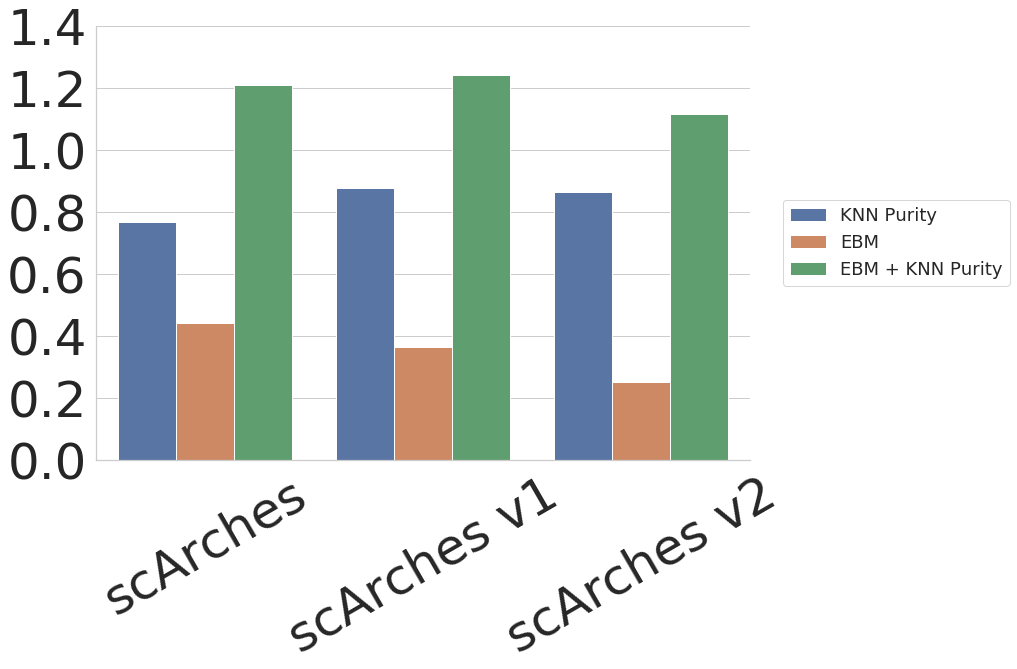

In [6]:
plt.close("all")
plt.figure(figsize=(12, 10))
g = sns.catplot(x="model", y="value", hue="type", kind="bar", 
                data=melted_df, legend=False, 
                height=10, aspect=1.5)
plt.xlabel('', fontsize=22)
plt.ylabel("", fontsize=22)
plt.yticks(np.arange(0, 1.6, 0.2))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
plt.tight_layout()
plt.savefig(f"./results/big_mouse_brain_metrics.pdf", dpi=300)
plt.show()

No handles with labels found to put in legend.


<Figure size 864x720 with 0 Axes>

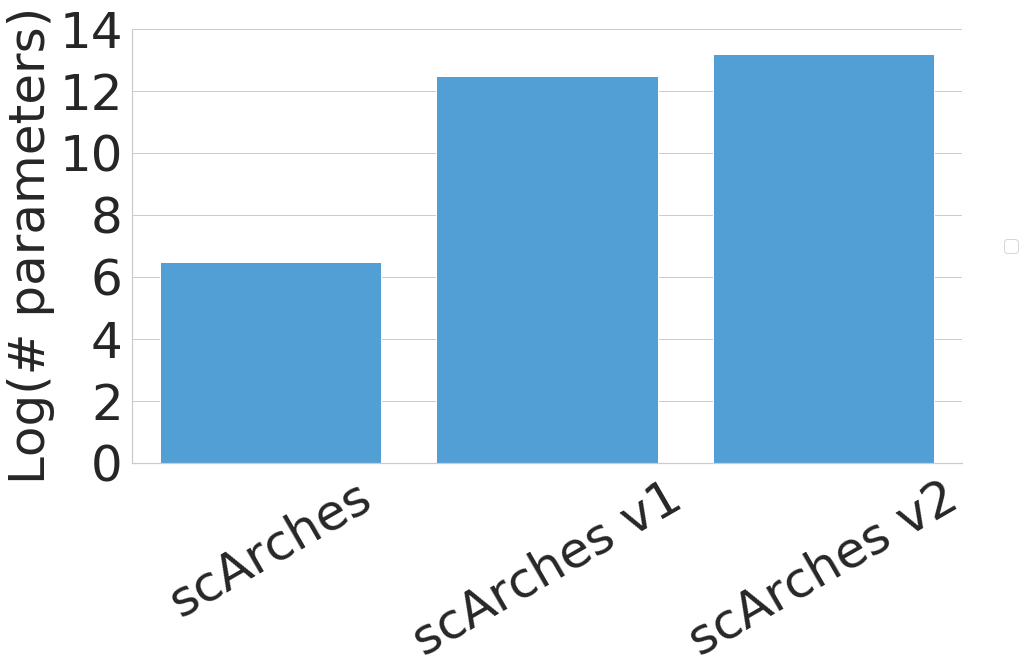

In [7]:
plt.close("all")
plt.figure(figsize=(12, 10))
g = sns.catplot(x="model", y="log_n_params",  kind="bar", 
                data=df, legend=False, color=sns.color_palette('husl', 3)[2],
                height=10, aspect=1.5)
plt.xlabel('', fontsize=22)
plt.ylabel("Log(# parameters)", fontsize=50)
plt.yticks(np.arange(0, 16, 2))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
plt.tight_layout()
plt.savefig(f"./results/big_mouse_brain_parameters.pdf", dpi=300)
plt.show()